# Oura Data Analysis

## Comparing sleep and heart rate data from 2 different Oura rings worn at the same time
Compared metrics:
* Total sleep time
* Awake time during sleep
* REM sleep time
* Light sleep time
* Deep sleep time
* Average resting heart rate during sleep
* Lowest resting heart rate during sleep

Some dates were missing data for the left hand ring -> no bar for those days for the left side.

In [340]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [341]:
colors = ['#003f5c','#2f4b7c','#00cf8e','#a05195','#d45087','#f95d6a','#ff7c43','#ffa600']
df_left_hand = pd.read_csv('data/oura_data_analysis - left_hand.csv')
df_right_hand = pd.read_csv('data/oura_data_analysis - right_hand.csv')
df_left_hand.fillna(0, inplace=True)
df_right_hand.fillna(0, inplace=True)

awake_time_column = "Awake Time"
rem_sleep_time_column = "REM Sleep Time"
light_sleep_time_column = "Light Sleep Time"
deep_sleep_time_column = "Deep Sleep Time"
average_hr_column = "Average Resting Heart Rate"
lowest_hr_column = "Lowest Resting Heart Rate"
barwidth = 0.3
separation = 0.05

## Sleep data

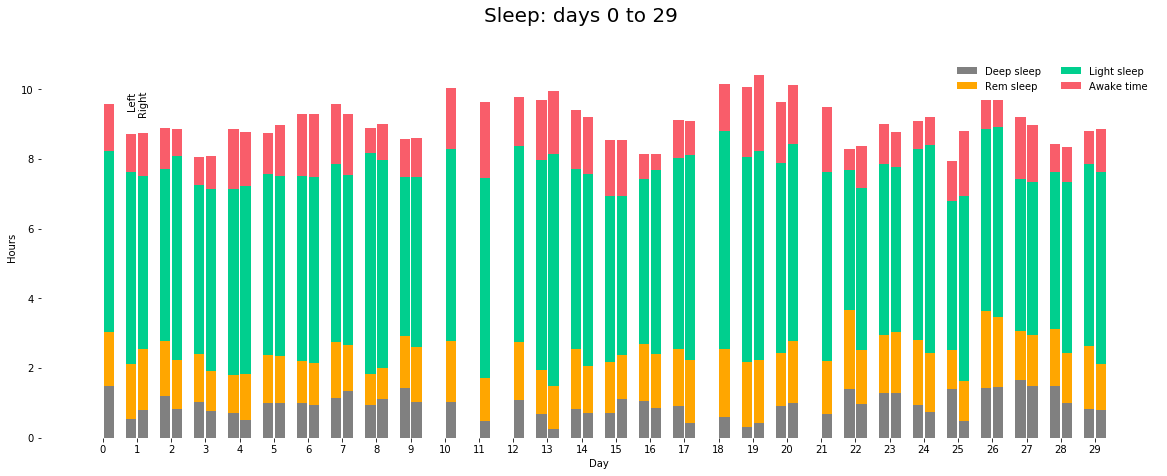

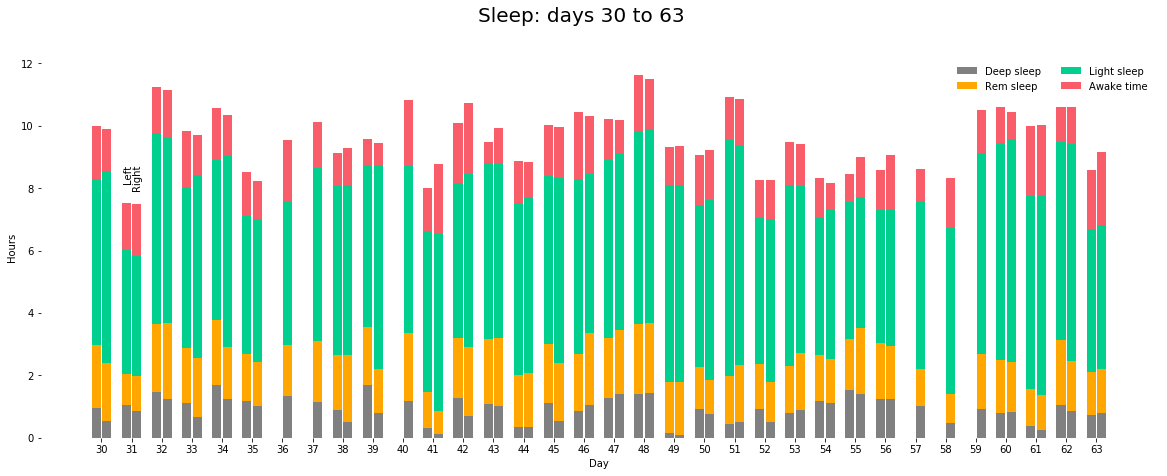

In [342]:
def plot_sleep_data(begin=0, end=30, divider=1):
    rng = end-begin
    x = np.array(range(rng))
    fig, ax = plt.subplots(1,1,figsize=(20,7))
    
    deep_left = df_left_hand[deep_sleep_time_column][begin:end] / divider
    light_left = df_left_hand[light_sleep_time_column][begin:end] / divider
    rem_left = df_left_hand[rem_sleep_time_column][begin:end] / divider
    awake_left = df_left_hand[awake_time_column][begin:end] / divider
    
    deep_right = df_right_hand[deep_sleep_time_column][begin:end] / divider
    light_right = df_right_hand[light_sleep_time_column][begin:end] / divider
    rem_right = df_right_hand[rem_sleep_time_column][begin:end] / divider
    awake_right = df_right_hand[awake_time_column][begin:end] / divider
    
    ax.bar(x-barwidth-separation, deep_left, color='grey', width=barwidth, label="Deep sleep")
    ax.bar(x-barwidth-separation, rem_left, color=colors[7], bottom=deep_left , width=barwidth, label="Rem sleep")
    ax.bar(x-barwidth-separation, light_left, color=colors[2], bottom=[a+b for a,b in zip(deep_left, rem_left)], width=barwidth, label="Light sleep")
    ax.bar(x-barwidth-separation, awake_left, color=colors[5], bottom=[a+b+c for a,b,c in zip(deep_left, rem_left, light_left)], width=barwidth, label="Awake time")
    ax.text(1-barwidth-3*separation, deep_left[begin+1]+rem_left[begin+1]+light_left[begin+1]+awake_left[begin+1]+1, "Left", rotation=90)
    
    ax.bar(x, deep_right, color='grey', width=barwidth)
    ax.bar(x, rem_right, color=colors[7], bottom=deep_right , width=barwidth)
    ax.bar(x, light_right, color=colors[2], bottom=[a+b for a,b in zip(deep_right, rem_right)], width=barwidth)
    ax.bar(x, awake_right, color=colors[5], bottom=[a+b+c for a,b,c in zip(deep_right, rem_right, light_right)], width=barwidth)
    ax.text(1-3*separation,deep_right[begin+1]+rem_right[begin+1]+light_right[begin+1]+awake_right[begin+1]+1, "Right", rotation=90)
    
    ax.set_xticklabels([str(day) for day in range(begin,end)])
    ax.set_xticks(x-barwidth/2-separation/2)
    ax.set(frame_on=False)
    ax.set(ylabel="Hours", xlabel="Day")
    fig.suptitle("Sleep: days "  + str(begin) + " to " + str(end-1), fontsize=20)
    plt.legend(fancybox=True, ncol=2, frameon=False);

    plt.show()

plot_sleep_data(0, 30, 3600)
plot_sleep_data(30, 64, 3600)

## HR data

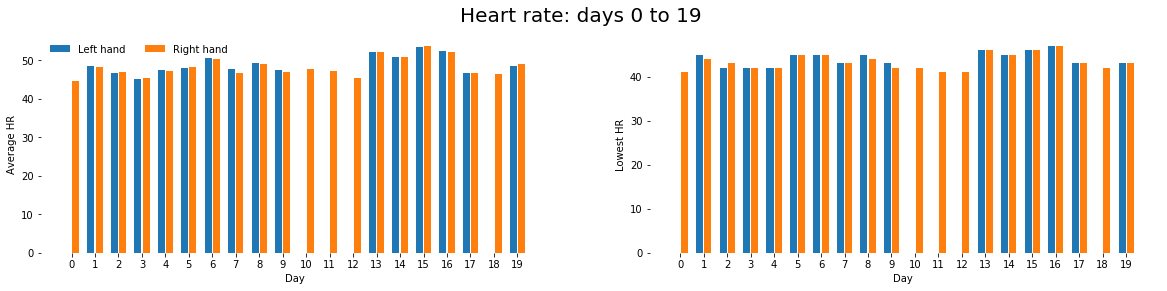

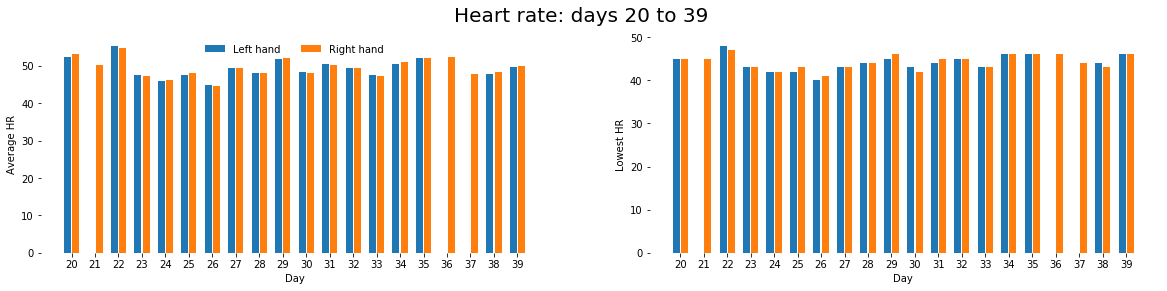

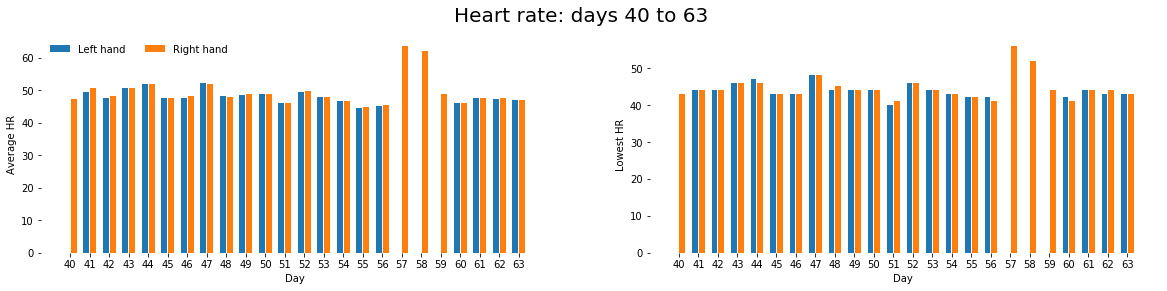

In [345]:
def plot_hr_data(begin=0, end=30):
    barwidth = 0.3
    separation = 0.05
    rng = end-begin
    
    x = np.array(range(rng))
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,4))
    
    average_left = df_left_hand[average_hr_column][begin:end]
    lowest_left = df_left_hand[lowest_hr_column][begin:end] 

    average_right = df_right_hand[average_hr_column][begin:end] 
    lowest_right = df_right_hand[lowest_hr_column][begin:end]

    
    ax1.bar(x-barwidth-separation, average_left, width=barwidth, align='center', label="Left hand")
    ax2.bar(x-barwidth-separation, lowest_left, width=barwidth,  align='center')
    
    ax1.bar(x, average_right, width=barwidth, align='center', label="Right hand")
    ax2.bar(x, lowest_right, width=barwidth,  align='center')
    
    ax1.set_xticklabels([str(day) for day in range(begin,end)])
    ax1.set_xticks(x-barwidth/2-separation/2)
    
    ax2.set_xticklabels([str(day) for day in range(begin,end)])
    ax2.set_xticks(x-barwidth/2-separation/2)
    
    ax1.set(frame_on=False)
    ax1.set(ylabel="Average HR", xlabel="Day")
    ax2.set(frame_on=False)
    ax2.set(ylabel="Lowest HR", xlabel="Day")
    fig.suptitle("Heart rate: days "  + str(begin) + " to " + str(end-1), fontsize=20)
    ax1.legend(fancybox=True, ncol=2, frameon=False);


    plt.show()

plot_hr_data(0,20)
plot_hr_data(20,40)
plot_hr_data(40,64)